In [1]:
import pandas as pd
import os
import geopandas as gpd

from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

/home/fterroso/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import datetime
e_date = datetime.datetime.strptime('2021-04-30', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

from datetime import date, timedelta

delta = e_date - i_date       # as timedelta

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

min_ndays = 40#int(len(target_days)*0.2)

In [3]:
twt_gdfs=[]
for d in tqdm_notebook(target_days):
    day_for_file= d.strftime('%Y-%m-%d')
    
    try:
        twt_gdf= gpd.read_file(os.path.join("data","TWT","mapped", "map_point_tweets_{}.geojson".format(day_for_file)), 
                               driver='GeoJSON', 
                               encoding='utf-8',
                              parse_dates=['timestamp'])
        twt_gdfs.append(twt_gdf)
    except:
        print("No file found for points: {}".format(day_for_file))
    
    try:
        twt_gdf= gpd.read_file(os.path.join("data", "TWT", "mapped", "map_poly_tweets_{}.geojson".format(day_for_file)), 
                               driver='GeoJSON', 
                               encoding='utf-8',
                              parse_dates=['timestamp'])
        twt_gdfs.append(twt_gdf)
    except:
        print("No file found for polygon: {}".format(day_for_file))

twt_gdf = pd.concat(twt_gdfs, ignore_index=True)
        

  0%|          | 0/395 [00:00<?, ?it/s]

No file found for points: 2020-04-08
No file found for polygon: 2020-04-08
No file found for points: 2020-08-06
No file found for polygon: 2020-08-06
No file found for points: 2020-08-11
No file found for polygon: 2020-08-11
No file found for points: 2020-08-18
No file found for polygon: 2020-08-18
No file found for points: 2020-09-23
No file found for polygon: 2020-09-23
No file found for points: 2020-10-03
No file found for polygon: 2020-10-03
No file found for points: 2020-10-09
No file found for polygon: 2020-10-09
No file found for points: 2020-10-21
No file found for polygon: 2020-10-21
No file found for points: 2020-10-23
No file found for polygon: 2020-10-23
No file found for points: 2020-10-28
No file found for polygon: 2020-10-28
No file found for points: 2020-11-08
No file found for polygon: 2020-11-08
No file found for points: 2020-11-17
No file found for polygon: 2020-11-17
No file found for points: 2020-11-21
No file found for polygon: 2020-11-21
No file found for points:

In [4]:
twt_gdf['timestamp']= pd.to_datetime(twt_gdf['timestamp'])
twt_gdf['date']= twt_gdf['timestamp'].apply(lambda x: x.date())

In [5]:
twt_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5598483 entries, 0 to 5598482
Data columns (total 9 columns):
 #   Column       Dtype              
---  ------       -----              
 0   tw_id        int64              
 1   user_id      int64              
 2   timestamp    datetime64[ns, UTC]
 3   primary_key  object             
 4   geometry     geometry           
 5   place_name   object             
 6   place_type   object             
 7   Shape_area   float64            
 8   date         object             
dtypes: datetime64[ns, UTC](1), float64(1), geometry(1), int64(2), object(4)
memory usage: 384.4+ MB


In [6]:
twt_gdf.tail()

,tw_id,user_id,timestamp,primary_key,geometry,place_name,place_type,Shape_area,date
5598478,1388972620519981059,457134049,2021-05-02 21:44:13+00:00,16133,"POLYGON ((-2.93728 39.34610, -2.93728 39.56020...","Mota del Cuervo, España",city,0.031248,2021-05-02
5598479,1388973919625961473,457134049,2021-05-02 21:49:22+00:00,16133,"POLYGON ((-2.93728 39.34610, -2.93728 39.56020...","Mota del Cuervo, España",city,0.031248,2021-05-02
5598480,1388985086679437321,457134049,2021-05-02 22:33:45+00:00,16133,"POLYGON ((-2.93728 39.34610, -2.93728 39.56020...","Mota del Cuervo, España",city,0.031248,2021-05-02
5598481,1388986089273274370,457134049,2021-05-02 22:37:44+00:00,16133,"POLYGON ((-2.93728 39.34610, -2.93728 39.56020...","Mota del Cuervo, España",city,0.031248,2021-05-02
5598482,1388991428349603844,457134049,2021-05-02 22:58:57+00:00,16133,"POLYGON ((-2.93728 39.34610, -2.93728 39.56020...","Mota del Cuervo, España",city,0.031248,2021-05-02


### Remove potential bots posting too many tweets per day

In [7]:
tweets_per_user= twt_gdf.groupby(['user_id', 'date']).size().to_frame()
tweets_per_user.columns= ['ntweets']
tweets_per_user= tweets_per_user.reset_index()
tweets_per_user.head()

,user_id,date,ntweets
0,2279,2020-07-11,5
1,3968,2020-05-22,1
2,3968,2020-07-18,1
3,3968,2020-07-23,1
4,3968,2020-07-24,1


In [8]:
tweets_per_user.describe()

,user_id,ntweets
count,1.980007e+06,1.980007e+06
mean,1.965223e+17,2.827507e+00
std,4.119014e+17,9.703176e+00
min,2.279000e+03,1.000000e+00
25%,2.468416e+08,1.000000e+00
50%,5.512074e+08,1.000000e+00
75%,2.920470e+09,2.000000e+00
max,1.388907e+18,1.346000e+03


In [9]:
daily_tweets_per_user= tweets_per_user.groupby('user_id').mean()
daily_tweets_per_user.head()

,ntweets
user_id,
2279,5.000000
3968,2.071429
5748,1.000000
5803,1.000000
7007,1.157895


In [10]:
daily_tweets_per_user.describe()

,ntweets
count,212558.000000
mean,1.497849
std,2.321070
min,1.000000
25%,1.000000
50%,1.000000
75%,1.500000
max,408.831234


In [11]:
clean_daily_tweets_per_user = daily_tweets_per_user[daily_tweets_per_user['ntweets']<= 100]

In [12]:
clean_daily_tweets_per_user.head()

,ntweets
user_id,
2279,5.000000
3968,2.071429
5748,1.000000
5803,1.000000
7007,1.157895


In [13]:
clean_daily_tweets_per_user.describe()

,ntweets
count,212544.000000
mean,1.486451
std,1.723624
min,1.000000
25%,1.000000
50%,1.000000
75%,1.500000
max,96.500000


In [14]:
no_bot_users = clean_daily_tweets_per_user.index.tolist()

In [15]:
clean_twt_df = twt_gdf[twt_gdf['user_id'].isin(no_bot_users)]

### We jsut kept users who post at least in *min_nday* days

In [16]:
ntwtperday_df=clean_twt_df.groupby('user_id')['date'].nunique().to_frame()
ntwtperday_df.columns=['ndates']
ntwtperday_df.head()

,ndates
user_id,
2279,1
3968,28
5748,5
5803,2
7007,19


In [17]:
target_users= ntwtperday_df[ntwtperday_df['ndates']>=min_ndays].index.tolist()

In [18]:
local_twt_df = clean_twt_df[clean_twt_df['user_id'].isin(target_users)]
local_twt_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3748529 entries, 211 to 5598471
Data columns (total 9 columns):
 #   Column       Dtype              
---  ------       -----              
 0   tw_id        int64              
 1   user_id      int64              
 2   timestamp    datetime64[ns, UTC]
 3   primary_key  object             
 4   geometry     geometry           
 5   place_name   object             
 6   place_type   object             
 7   Shape_area   float64            
 8   date         object             
dtypes: datetime64[ns, UTC](1), float64(1), geometry(1), int64(2), object(4)
memory usage: 286.0+ MB


In [19]:
local_twt_df.head()

,tw_id,user_id,timestamp,primary_key,geometry,place_name,place_type,Shape_area,date
211,1245274706393038849,709417970347466754,2020-04-01 09:00:00+00:00,08147,POINT (1.89248 41.54520),NaN,NaN,NaN,2020-04-01
520,1245113663041810566,17721280,2020-03-31 22:20:05+00:00,08019,POINT (2.12631 41.37283),NaN,NaN,NaN,2020-03-31
522,1245114721205997568,472122480,2020-03-31 22:24:17+00:00,08019,POINT (2.14473 41.40643),NaN,NaN,NaN,2020-03-31
525,1245117832343556098,2468925683,2020-03-31 22:36:39+00:00,08019,POINT (2.16500 41.38063),NaN,NaN,NaN,2020-03-31
526,1245118511027900417,960267186,2020-03-31 22:39:20+00:00,08019,POINT (2.16830 41.38940),NaN,NaN,NaN,2020-03-31


### We kept users who post in at least two different locations

In [20]:
n_mas_peruser= local_twt_df.groupby('user_id')['primary_key'].nunique().to_frame()

In [21]:
mob_users= n_mas_peruser[n_mas_peruser['primary_key']>1].index.tolist()

In [22]:
local_mob_twt_df= local_twt_df[local_twt_df['user_id'].isin(mob_users)]

In [23]:
twts_per_area= local_mob_twt_df.groupby(['user_id', 'primary_key']).size().to_frame()
twts_per_area.columns=['n_tweets']
twts_per_area= twts_per_area.reset_index()
twts_per_area.head()

,user_id,primary_key,n_tweets
0,59983,22084_AM,1
1,59983,22117_AM,1
2,59983,22907_AM,3
3,59983,50038_AM,23
4,59983,50062_AM,1


In [24]:
home_twt= twts_per_area.sort_values('n_tweets', ascending=False).drop_duplicates(['user_id'])
home_twt

,user_id,primary_key,n_tweets
61274,884187661216268288,29067,16618
19846,223108098,31060,12151
65567,1183042992820633600,28903,11623
61632,912960710245847040,08904,10328
13247,144996365,29067,10042
...,...,...,...
63789,1055450127970824192,48036,5
54629,3048544857,42025_AM,5
39547,563012094,37274,4
54325,3023172234,51001,4


In [25]:
home_twt= home_twt[['user_id', 'primary_key']]
home_twt.columns='user_id home_ma'.split()
home_twt.head()

,user_id,home_ma
61274,884187661216268288,29067
19846,223108098,31060
65567,1183042992820633600,28903
61632,912960710245847040,08904
13247,144996365,29067


In [26]:
home_count=home_twt['home_ma'].value_counts().to_frame()
home_count= home_count.reset_index()
home_count.columns= 'ma count'.split()
home_count.head()

,ma,count
0,28079,860
1,29067,576
2,08019,522
3,33044,195
4,46250,189


### Plot a map with the distribution of homes

In [27]:
census_zones_gdf = gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')
census_zones_wcount_gdf = census_zones_gdf.merge(home_count, left_on='primary_key', right_on='ma')

In [28]:
census_zones_wcount_gdf.head()

,primary_key,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,geometry,ma,count
0,01001_AM,359.212,17.0,4.0,1.0,7470,3945,3525,0.047326,0.011135,0.002784,"POLYGON ((-2.46644 42.78842, -2.46983 42.78803...",01001_AM,1
1,01002,96.348,8.0,1.0,1.0,10264,5044,5220,0.083032,0.010379,0.010379,"MULTIPOLYGON (((-2.97525 42.93816, -2.97702 42...",01002,1
2,01036,37.559,5.0,1.0,0.0,18118,8868,9250,0.133124,0.026625,0.000000,"POLYGON ((-2.93850 43.13864, -2.93541 43.13658...",01036,5
3,01043_AM,504.906,28.0,3.0,0.0,7600,3997,3603,0.055456,0.005942,0.000000,"POLYGON ((-2.40033 42.54267, -2.40041 42.54030...",01043_AM,1
4,02009,531.892,5.0,8.0,1.0,24511,12208,12303,0.009400,0.015041,0.001880,"POLYGON ((-1.29835 38.83792, -1.29186 38.84288...",02009,5


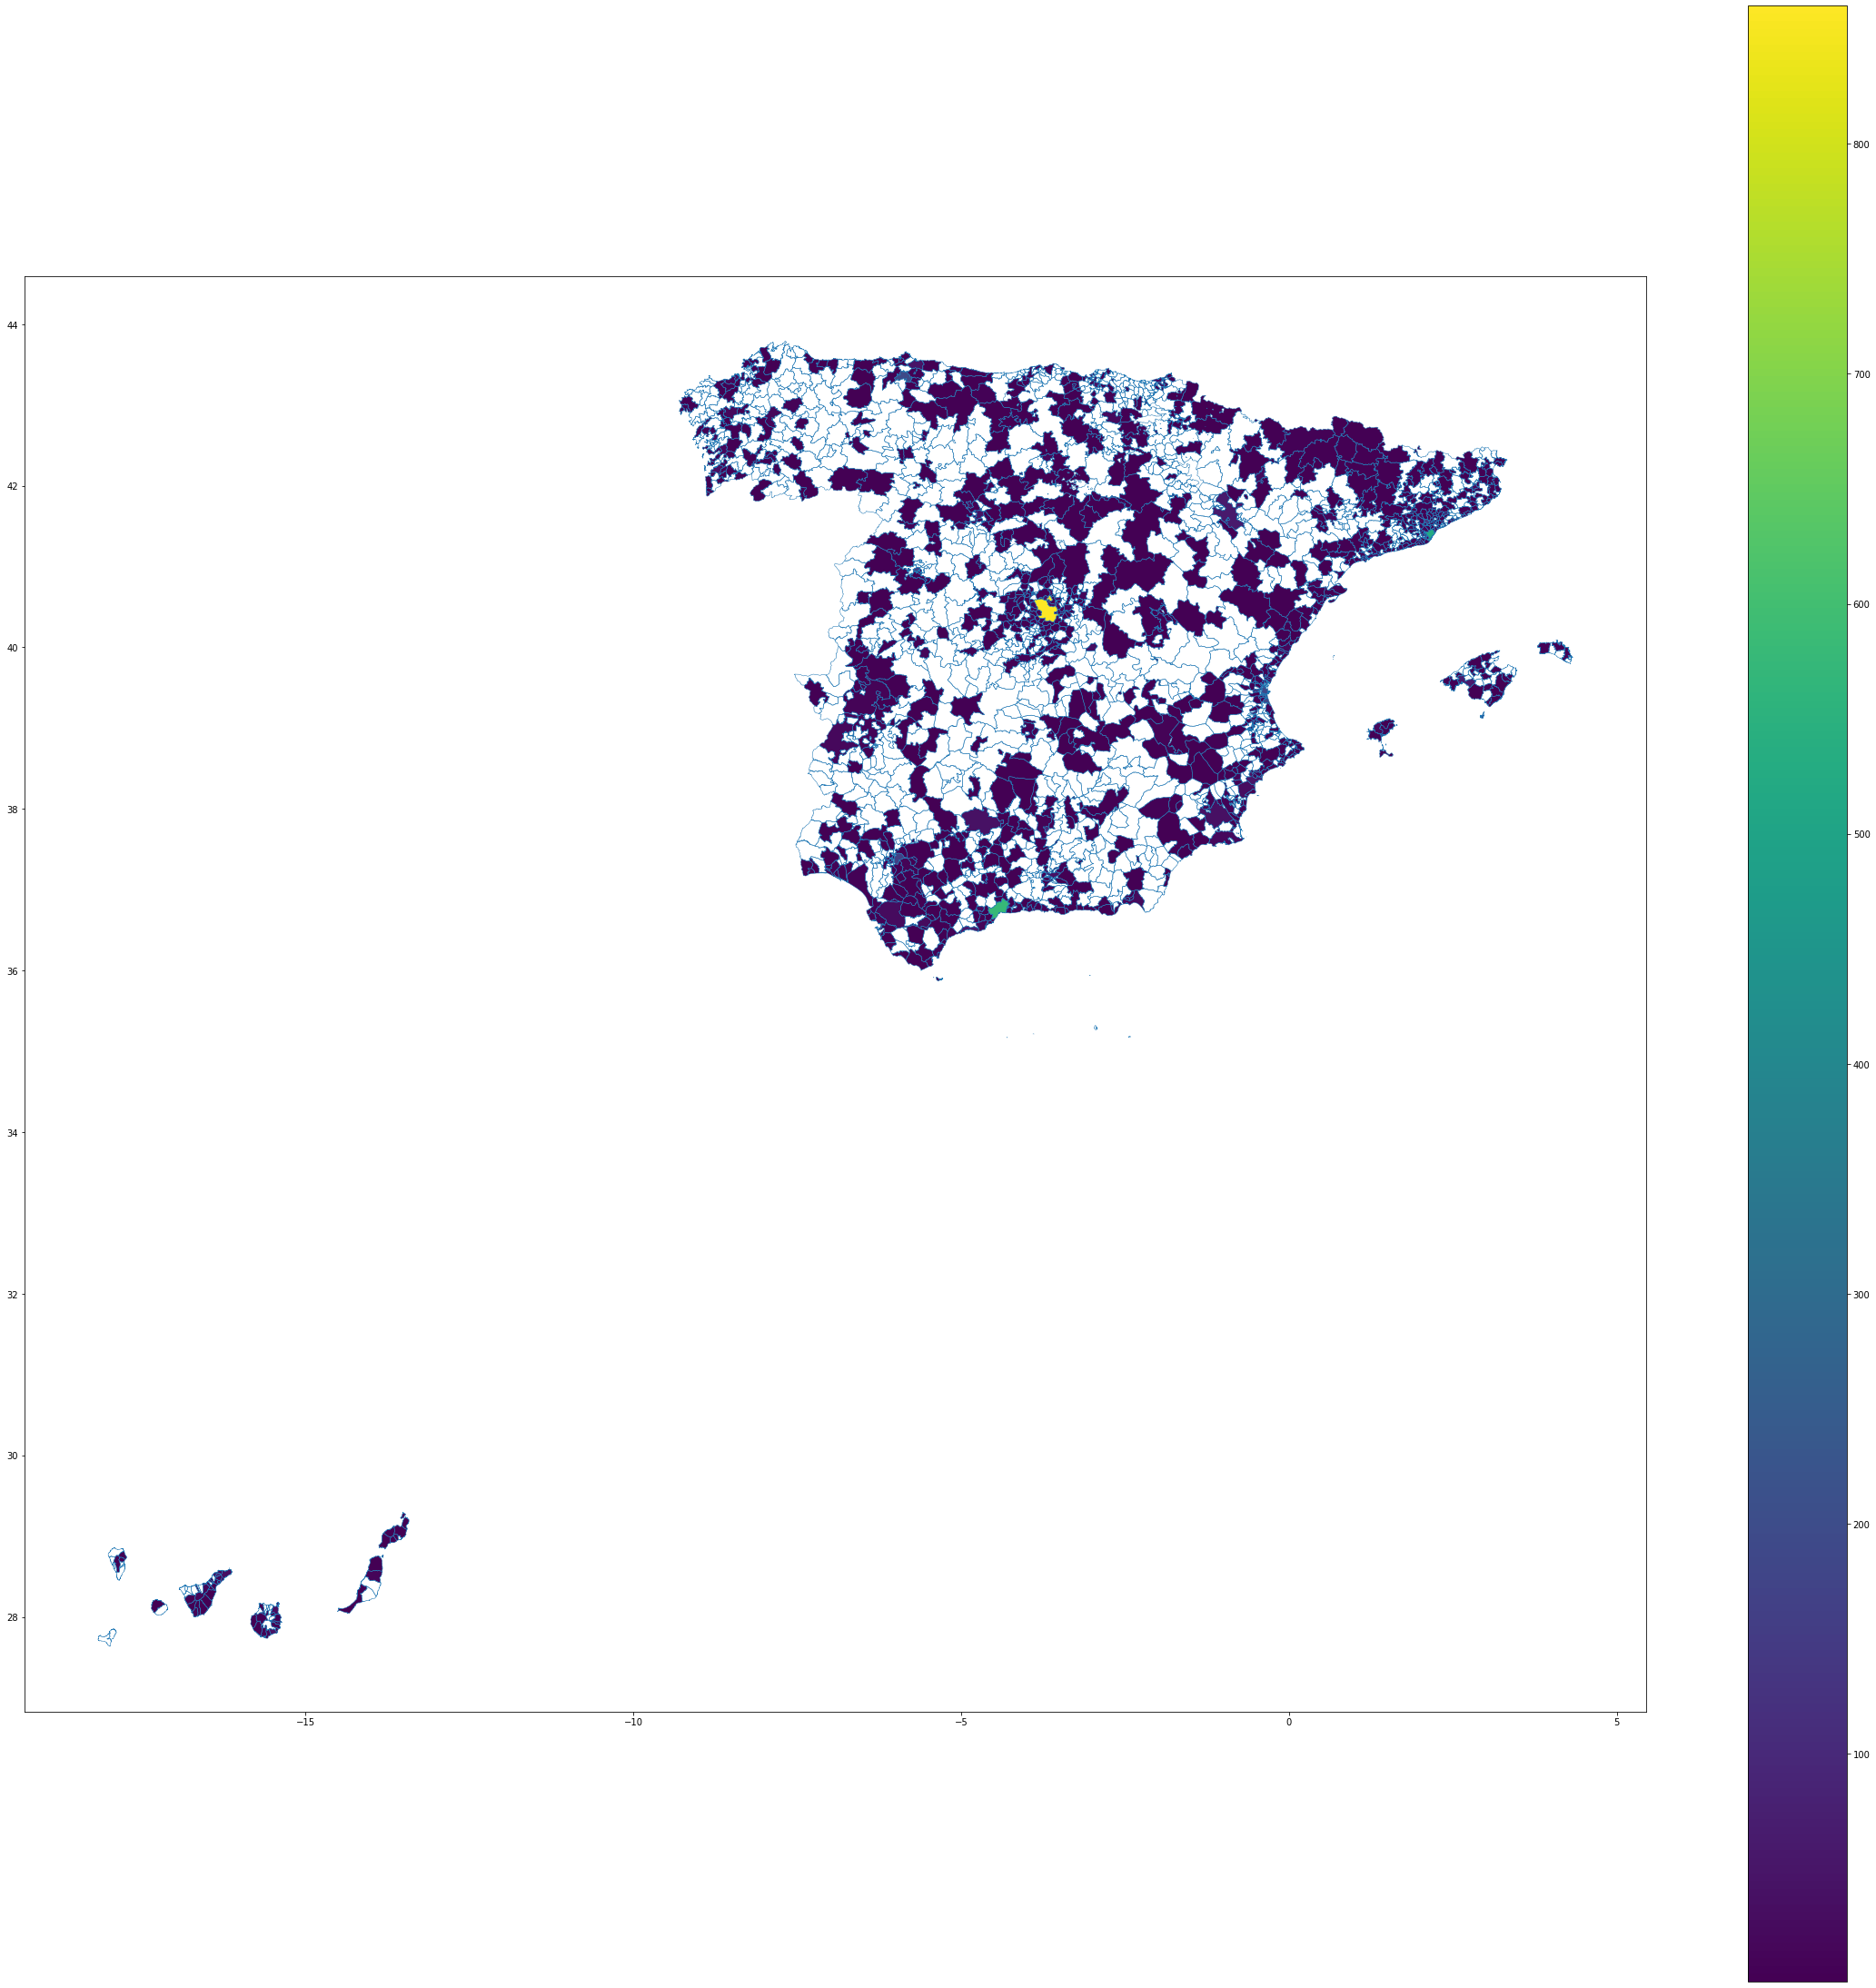

In [29]:
ax=census_zones_gdf.boundary.plot(figsize=(40,40),linewidth=0.5);
census_zones_wcount_gdf.plot('count',ax=ax, legend=True);

In [32]:
census_zones_wcount_gdf.corr()

,area_km2,Viv-total,hotels-total,camps-total,POB20,HOMBRES,MUJERES,Viv-per-area,hotels-per-area,camps-per-area,count
area_km2,1.000000,-0.029017,0.193222,0.215683,0.025765,0.026034,0.025521,-0.186165,-0.157651,-0.098112,0.006333
Viv-total,-0.029017,1.000000,0.119223,0.256102,0.094288,0.096668,0.092152,0.546594,0.145351,0.193136,0.033787
hotels-total,0.193222,0.119223,1.000000,0.151972,0.852407,0.850796,0.853642,-0.009523,0.508209,0.012728,0.771125
camps-total,0.215683,0.256102,0.151972,1.000000,0.019972,0.020928,0.019119,0.117472,0.067885,0.581056,0.029180
POB20,0.025765,0.094288,0.852407,0.019972,1.000000,0.999862,0.999891,0.025061,0.332377,0.000509,0.859995
HOMBRES,0.026034,0.096668,0.850796,0.020928,0.999862,1.000000,0.999509,0.025599,0.333736,0.000695,0.858497
MUJERES,0.025521,0.092152,0.853642,0.019119,0.999891,0.999509,1.000000,0.024577,0.331094,0.000344,0.861128
Viv-per-area,-0.186165,0.546594,-0.009523,0.117472,0.025061,0.025599,0.024577,1.000000,0.256040,0.318616,0.015432
hotels-per-area,-0.157651,0.145351,0.508209,0.067885,0.332377,0.333736,0.331094,0.256040,1.000000,0.167492,0.322679
camps-per-area,-0.098112,0.193136,0.012728,0.581056,0.000509,0.000695,0.000344,0.318616,0.167492,1.000000,0.005937


### Save the file

In [30]:
home_twt.to_csv(os.path.join('data','TWT', 'mapped', 'home_TWT.csv'))

In [31]:
print("That's all folks!")

That's all folks!
